In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("campaign_data.csv.zip")

In [5]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [6]:
df['CampaignID'].value_counts()

,count
CampaignID,
CID_00000,1
CID_66650,1
CID_66672,1
CID_66671,1
CID_66670,1
...,...
CID_33331,1
CID_33330,1
CID_33329,1


In [7]:
df = df.set_index("CampaignID")

In [8]:
df.describe()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


<Axes: >

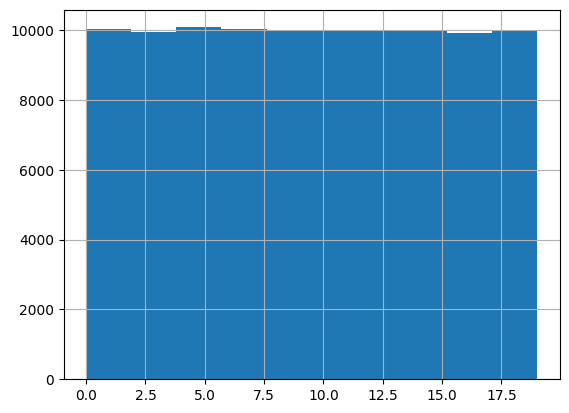

In [9]:
df['OwnerExperience'].hist()

In [10]:
df.corr(numeric_only=True)

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
GoalAmount,1.000000,0.863471,-0.003708,0.005366,0.003173,-0.005022,-0.002585,0.004240
RaisedAmount,0.863471,1.000000,-0.003111,0.003375,-0.000004,-0.002970,-0.001606,0.384000
DurationDays,-0.003708,-0.003111,1.000000,-0.002663,0.000883,0.004913,-0.003346,0.002787
NumBackers,0.005366,0.003375,-0.002663,1.000000,-0.000273,-0.001548,-0.004977,-0.002590
OwnerExperience,0.003173,-0.000004,0.000883,-0.000273,1.000000,0.001623,-0.002813,-0.007015
SocialMediaPresence,-0.005022,-0.002970,0.004913,-0.001548,0.001623,1.000000,0.002759,0.000442
NumUpdates,-0.002585,-0.001606,-0.003346,-0.004977,-0.002813,0.002759,1.000000,0.000530
IsSuccessful,0.004240,0.384000,0.002787,-0.002590,-0.007015,0.000442,0.000530,1.000000


In [11]:
X = df.drop('IsSuccessful', axis=1)
Y = df['IsSuccessful']

In [12]:
numerical = X.describe().columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, CID_00000 to CID_99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   GoalAmount           100000 non-null  int64  
 1   RaisedAmount         100000 non-null  float64
 2   DurationDays         100000 non-null  int64  
 3   NumBackers           100000 non-null  int64  
 4   Category             100000 non-null  object 
 5   LaunchMonth          100000 non-null  object 
 6   Country              100000 non-null  object 
 7   Currency             100000 non-null  object 
 8   OwnerExperience      100000 non-null  int64  
 9   VideoIncluded        100000 non-null  object 
 10  SocialMediaPresence  100000 non-null  int64  
 11  NumUpdates           100000 non-null  int64  
 12  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 10.7+ MB


In [14]:
categorical = X.describe(include='object').columns

## Base model with numerical only

### All numerical coumns

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X[numerical], Y, test_size=0.25)
base_model = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("LR", LogisticRegression())
    ]
)
base_model.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LogisticRegression())])

In [17]:
f1_score(Y_test, base_model.predict(X_test))

0.9989926260224846

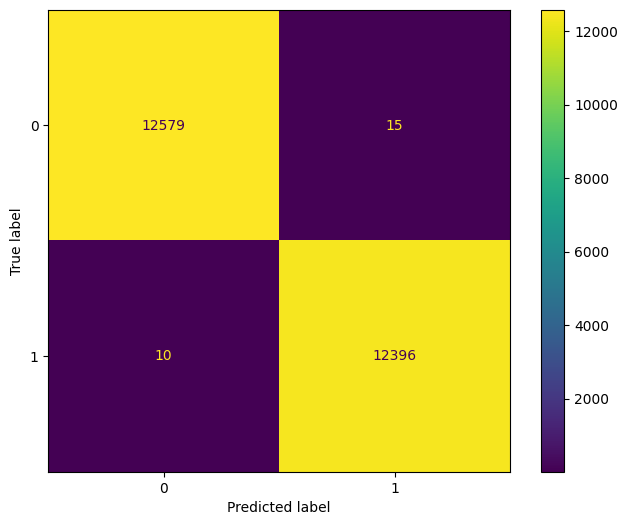

In [18]:
cm = confusion_matrix(Y_test, base_model.predict(X_test), labels=base_model.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

### Only two columns remain (GoalAmount, RaisedAmount)

In [19]:
two_columns = df[['GoalAmount', 'RaisedAmount']]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(two_columns, Y, test_size=0.25)

In [21]:
X_train

,GoalAmount,RaisedAmount
CampaignID,,
CID_40040,97931,132374.654961
CID_81755,11392,9502.858398
CID_89623,95058,69109.369217
CID_38285,44364,29678.803044
CID_77493,79104,63938.450015
...,...,...
CID_46250,70656,49276.286704
CID_61118,63994,67708.046665
CID_58524,63168,73677.824004


In [22]:
two_columns_model = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("LR", LogisticRegression())
    ]
)
two_columns_model.fit(X_train, Y_train)
f1_score(Y_test, two_columns_model.predict(X_test))

0.999122106943336

### Two columns with PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(two_columns)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, Y, test_size=0.25)
pca_model = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("LR", LogisticRegression())
    ]
)
pca_model.fit(X_train, Y_train)
f1_score(Y_test, pca_model.predict(X_test))

0.5724748490945674

### Only one columns remains (RaisedAmount)

In [26]:
one_column = df[['RaisedAmount']]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(one_column, Y, test_size=0.25)
one_column_model = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("LR", LogisticRegression())
    ]
)
one_column_model.fit(X_train, Y_train)
f1_score(Y_test, one_column_model.predict(X_test))

0.6301483728855825

In [28]:
X_train

,RaisedAmount
CampaignID,
CID_18833,60779.101574
CID_64686,9716.277327
CID_31841,142175.936928
CID_83100,14144.476293
CID_33505,121981.607462
...,...
CID_01997,24157.824866
CID_82116,20260.876270
CID_89180,51164.154831


### Delete from initial dataset column Raised amount

In [29]:
df = df.drop("RaisedAmount", axis=1)

In [30]:
X = df.drop('IsSuccessful', axis=1)
Y = df['IsSuccessful']

In [31]:
numerical = X.describe().columns

### LogisticRegression without RaisedAmount

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X[numerical], Y, test_size=0.25)
new_base_model = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("LR", LogisticRegression())
    ]
)
new_base_model.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LogisticRegression())])

In [33]:
f1_score(Y_test, new_base_model.predict(X_test))

0.49366677492692435

### Support Vector Machine

In [34]:
from sklearn.svm import LinearSVC

In [35]:
svm = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("svm", LinearSVC())
    ]
)

In [36]:
svm.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('svm', LinearSVC())])

In [37]:
f1_score(Y_test, svm.predict(X_test))

0.49366677492692435

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

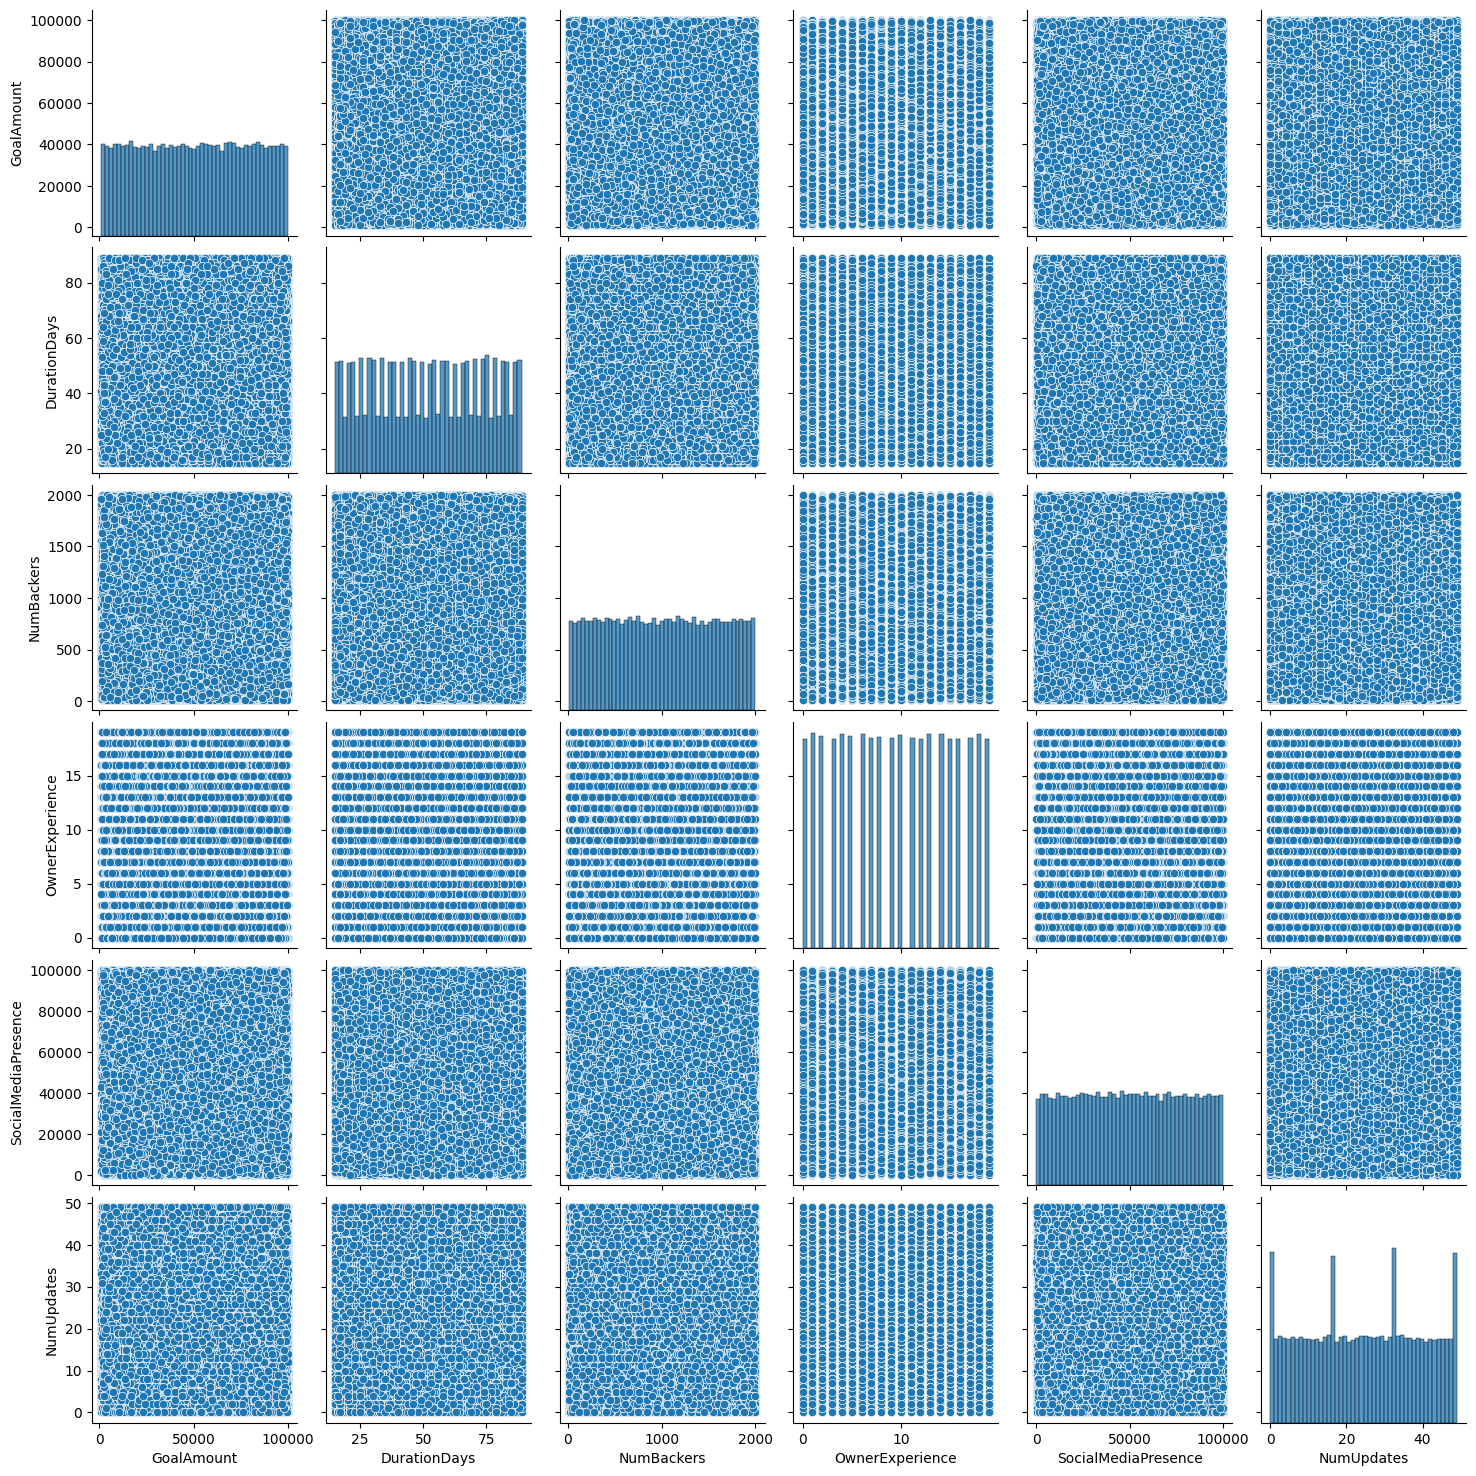

In [39]:
sns.pairplot(data=X)

In [40]:
knn = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=17))
    ]
)
knn.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=17))])

In [41]:
f1_score(Y_test, knn.predict(X_test))

0.5126127199777539

### DesionTree, RandomForest

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 3)]
max_depth = [int(x) for x in np.linspace(1, 30, num = 4)]


param_grid =  {'rf__n_estimators': n_estimators,
               'rf__max_depth': max_depth
              }

### Передадим в GridSearchCV

search = GridSearchCV(rf,
                      param_grid,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, Y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, Y_test)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START rf__max_depth=1, rf__n_estimators=1........................
[CV 1/5; 1/12] END rf__max_depth=1, rf__n_estimators=1;, score=-0.499 total time=   0.1s
[CV 2/5; 1/12] START rf__max_depth=1, rf__n_estimators=1........................
[CV 2/5; 1/12] END rf__max_depth=1, rf__n_estimators=1;, score=-0.499 total time=   0.0s
[CV 3/5; 1/12] START rf__max_depth=1, rf__n_estimators=1........................
[CV 3/5; 1/12] END rf__max_depth=1, rf__n_estimators=1;, score=-0.499 total time=   0.0s
[CV 4/5; 1/12] START rf__max_depth=1, rf__n_estimators=1........................
[CV 4/5; 1/12] END rf__max_depth=1, rf__n_estimators=1;, score=-0.497 total time=   0.1s
[CV 5/5; 1/12] START rf__max_depth=1, rf__n_estimators=1........................
[CV 5/5; 1/12] END rf__max_depth=1, rf__n_estimators=1;, score=-0.499 total time=   0.0s
[CV 1/5; 2/12] START rf__max_depth=1, rf__n_estimators=5........................
[CV 1/5;

In [43]:
dt = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("dt", DecisionTreeClassifier(max_depth=30, max_features=30))
    ]
)

In [44]:
dt.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30, max_features=30))])

In [45]:
f1_score(Y_test, dt.predict(X_test))

0.4992404253617974

In [90]:
rf = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("rf", RandomForestClassifier(n_estimators=5, max_depth=1))
    ]
)

In [91]:
rf.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=1, n_estimators=5))])

In [92]:
f1_score(Y_test, rf.predict(X_test))

0.644699058937253

### Ensemble - Catboost

In [49]:
!pip install catboost

In [50]:
from catboost import CatBoostRegressor

In [51]:
catboost = CatBoostRegressor()
catboost.fit(X_train, Y_train)

Learning rate set to 0.080991
0:	learn: 0.4999694	total: 81.5ms	remaining: 1m 21s
1:	learn: 0.4999331	total: 97.1ms	remaining: 48.5s
2:	learn: 0.4999093	total: 118ms	remaining: 39.1s
3:	learn: 0.4998763	total: 139ms	remaining: 34.7s
4:	learn: 0.4998370	total: 161ms	remaining: 32s
5:	learn: 0.4998123	total: 177ms	remaining: 29.3s
6:	learn: 0.4997942	total: 199ms	remaining: 28.2s
7:	learn: 0.4997697	total: 227ms	remaining: 28.2s
8:	learn: 0.4997398	total: 243ms	remaining: 26.7s
9:	learn: 0.4997127	total: 257ms	remaining: 25.5s
10:	learn: 0.4996775	total: 343ms	remaining: 30.8s
11:	learn: 0.4996540	total: 367ms	remaining: 30.2s
12:	learn: 0.4996282	total: 412ms	remaining: 31.3s
13:	learn: 0.4995964	total: 455ms	remaining: 32s
14:	learn: 0.4995783	total: 505ms	remaining: 33.2s
15:	learn: 0.4995570	total: 566ms	remaining: 34.8s
16:	learn: 0.4995375	total: 624ms	remaining: 36.1s
17:	learn: 0.4995040	total: 671ms	remaining: 36.6s
18:	learn: 0.4994871	total: 725ms	remaining: 37.4s
19:	learn: 0

In [52]:
train_pred = catboost.predict(X_train)
test_pred = catboost.predict(X_test)

train_err = np.mean((train_pred - Y_train)**2)
test_err = np.mean((test_pred - Y_test)**2)

print("Train error: ", train_err.round(3))
print("Test error: ", test_err.round(3))

Train error:  0.23
Test error:  0.253


## Include categorical features

In [53]:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

In [54]:
df.head()

,GoalAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
CampaignID,,,,,,,,,,,,
CID_00000,76159,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
CID_00001,69394,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
CID_00002,18652,58,148,Film,February,USA,EUR,17,No,3942,9,1
CID_00003,19487,39,780,Film,October,Germany,AUD,10,No,22047,35,1
CID_00004,26734,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [55]:
df[categorical].nunique() <5

,0
Category,False
LaunchMonth,False
Country,False
Currency,False
VideoIncluded,True


In [56]:
cols_for_ohe = [x for x in categorical if df[x].nunique() < 5]
cols_for_mte = [x for x in categorical if df[x].nunique() >= 5]

cols_for_ohe_idx = [list(df.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(df.columns).index(col) for col in cols_for_mte]

In [57]:
t = [
    ("OHE", OneHotEncoder(), cols_for_ohe_idx),
    ("MTE", TargetEncoder(), cols_for_mte_idx),
    ("Scaler", StandardScaler(), numerical)
]

In [58]:
col_transformer = ColumnTransformer(transformers=t)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [60]:
cat_model = Pipeline(
    [
        ("transform", col_transformer),
        ("dt", DecisionTreeClassifier(max_depth=10))
    ]
)

In [61]:
cat_model.fit(X_train, Y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(), [8]),
                                                 ('MTE', TargetEncoder(),
                                                  [3, 4, 5, 6]),
                                                 ('Scaler', StandardScaler(),
                                                  Index(['GoalAmount', 'DurationDays', 'NumBackers', 'OwnerExperience',
       'SocialMediaPresence', 'NumUpdates'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier(max_depth=10))])

In [62]:
f1_score(Y_test, cat_model.predict(X_test))

0.5017738270817554

### CatBoost

In [63]:
categorical_list = list(df.describe(include='object').columns)

In [64]:
categorical_list

['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded']

In [65]:
catboost = CatBoostRegressor()
catboost.fit(X_train, Y_train, cat_features=categorical_list)

Learning rate set to 0.080991
0:	learn: 0.4999876	total: 157ms	remaining: 2m 36s
1:	learn: 0.4999635	total: 346ms	remaining: 2m 52s
2:	learn: 0.4999613	total: 449ms	remaining: 2m 29s
3:	learn: 0.4999590	total: 531ms	remaining: 2m 12s
4:	learn: 0.4999430	total: 705ms	remaining: 2m 20s
5:	learn: 0.4999129	total: 947ms	remaining: 2m 36s
6:	learn: 0.4999108	total: 1.01s	remaining: 2m 23s
7:	learn: 0.4999106	total: 1.07s	remaining: 2m 12s
8:	learn: 0.4998969	total: 1.25s	remaining: 2m 17s
9:	learn: 0.4998899	total: 1.37s	remaining: 2m 15s
10:	learn: 0.4998874	total: 1.48s	remaining: 2m 13s
11:	learn: 0.4998551	total: 1.67s	remaining: 2m 17s
12:	learn: 0.4998408	total: 1.85s	remaining: 2m 20s
13:	learn: 0.4998311	total: 2.01s	remaining: 2m 21s
14:	learn: 0.4998219	total: 2.13s	remaining: 2m 20s
15:	learn: 0.4998056	total: 2.26s	remaining: 2m 18s
16:	learn: 0.4997875	total: 2.36s	remaining: 2m 16s
17:	learn: 0.4997752	total: 2.46s	remaining: 2m 13s
18:	learn: 0.4997547	total: 2.6s	remaining: 

In [66]:
train_pred = catboost.predict(X_train)
test_pred = catboost.predict(X_test)

train_err = np.mean((train_pred - Y_train)**2)
test_err = np.mean((test_pred - Y_test)**2)

print("Train error: ", train_err.round(3))
print("Test error: ", test_err.round(3))

Train error:  0.237
Test error:  0.252


## XGBoost

In [77]:
!pip install xgboost-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.3 MB/s eta 0:00:00


In [79]:
from xgboost import XGBClassifier

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X[numerical], Y, test_size=0.25)

In [81]:
xgb = XGBClassifier()

In [82]:
xgb.fit(X_train, Y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)